# Load reviews and import modules

In [1]:
with open('../datasets/imdb_reviews.pickle', 'rb') as pcl_file:
    import pickle
    dataset = pickle.load(pcl_file)

In [2]:
import numpy as np
import pandas as pd
import sklearn as sl

# Vectorize the reviews

Whole dataset contains `N` distinct words, so each review turns into a vector with `N` components, in which each coordinate represents the number of occurences of corresponding word in the review.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,1))
review_codes = vectorizer.fit_transform(dataset['review'].values)

# Calculate co-occurence matrix

The number of times two particular words occur in the same review can be calculated via multiplying transposed matrix of review codes and itself. 

In [4]:
# coo_matrix = review_codes.T * review_codes

# Find the most frequent words (of length more than 3) and their codes

In [5]:
from keras.utils import np_utils

nbs_occur = np.asarray(review_codes.sum(axis=0)).ravel()
feat_names = vectorizer.get_feature_names()

nb_top = 20
sz = review_codes.shape[1]

pairs = [x for x in zip(nbs_occur, feat_names) if len(x[1]) > 3]
top_pairs = sorted(pairs, reverse=True)[:nb_top]
top_words = [x[1] for x in top_pairs]
top_word_codes = np_utils.to_categorical([vectorizer.vocabulary_.get(x) for x in top_words], nb_classes=sz)

Using Theano backend.


# Use SVD and transform 20 the most frequent words into 2D vectors

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
svd.fit(review_codes)
top_low_dim = svd.transform(top_word_codes)

# Visualize them

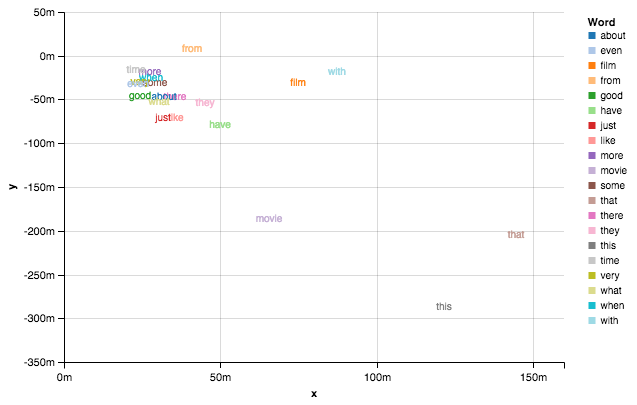

In [7]:
from altair import *

tidy = pd.DataFrame(top_low_dim, columns=['x', 'y'])
tidy['word'] = top_words

Chart(tidy).mark_text().encode(
    x='x',
    y='y',
    color=Color('word', title='Word', scale=Scale(range='category20')),
    text='word'
)